## Step 1: Reading and Understanding the Data

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# get the info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# renaming columns
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [10]:
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Copying the dataframe into new
df_copy = df.copy()

In [12]:
# checking the shape of new dataframe

df.shape

(730, 16)

In [13]:
# dropping the duplicates

df.drop_duplicates(inplace=True)

In [14]:
# re-verifying the shape of new dataframe

df.shape

(730, 16)

#### There are no duplicates

In [15]:
# dropping unnecessary columns

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [16]:
# Encoding/mapping the season column
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
# Encoding/mapping the month column
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [18]:
# Encoding/mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
# Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
# Encoding/mapping the Year column
df.year = df.year.map({0:'2018',1:'2019'})

In [21]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    object 
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

In [23]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,dec,0,thu,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,dec,0,fri,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,dec,0,sat,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,dec,0,sun,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


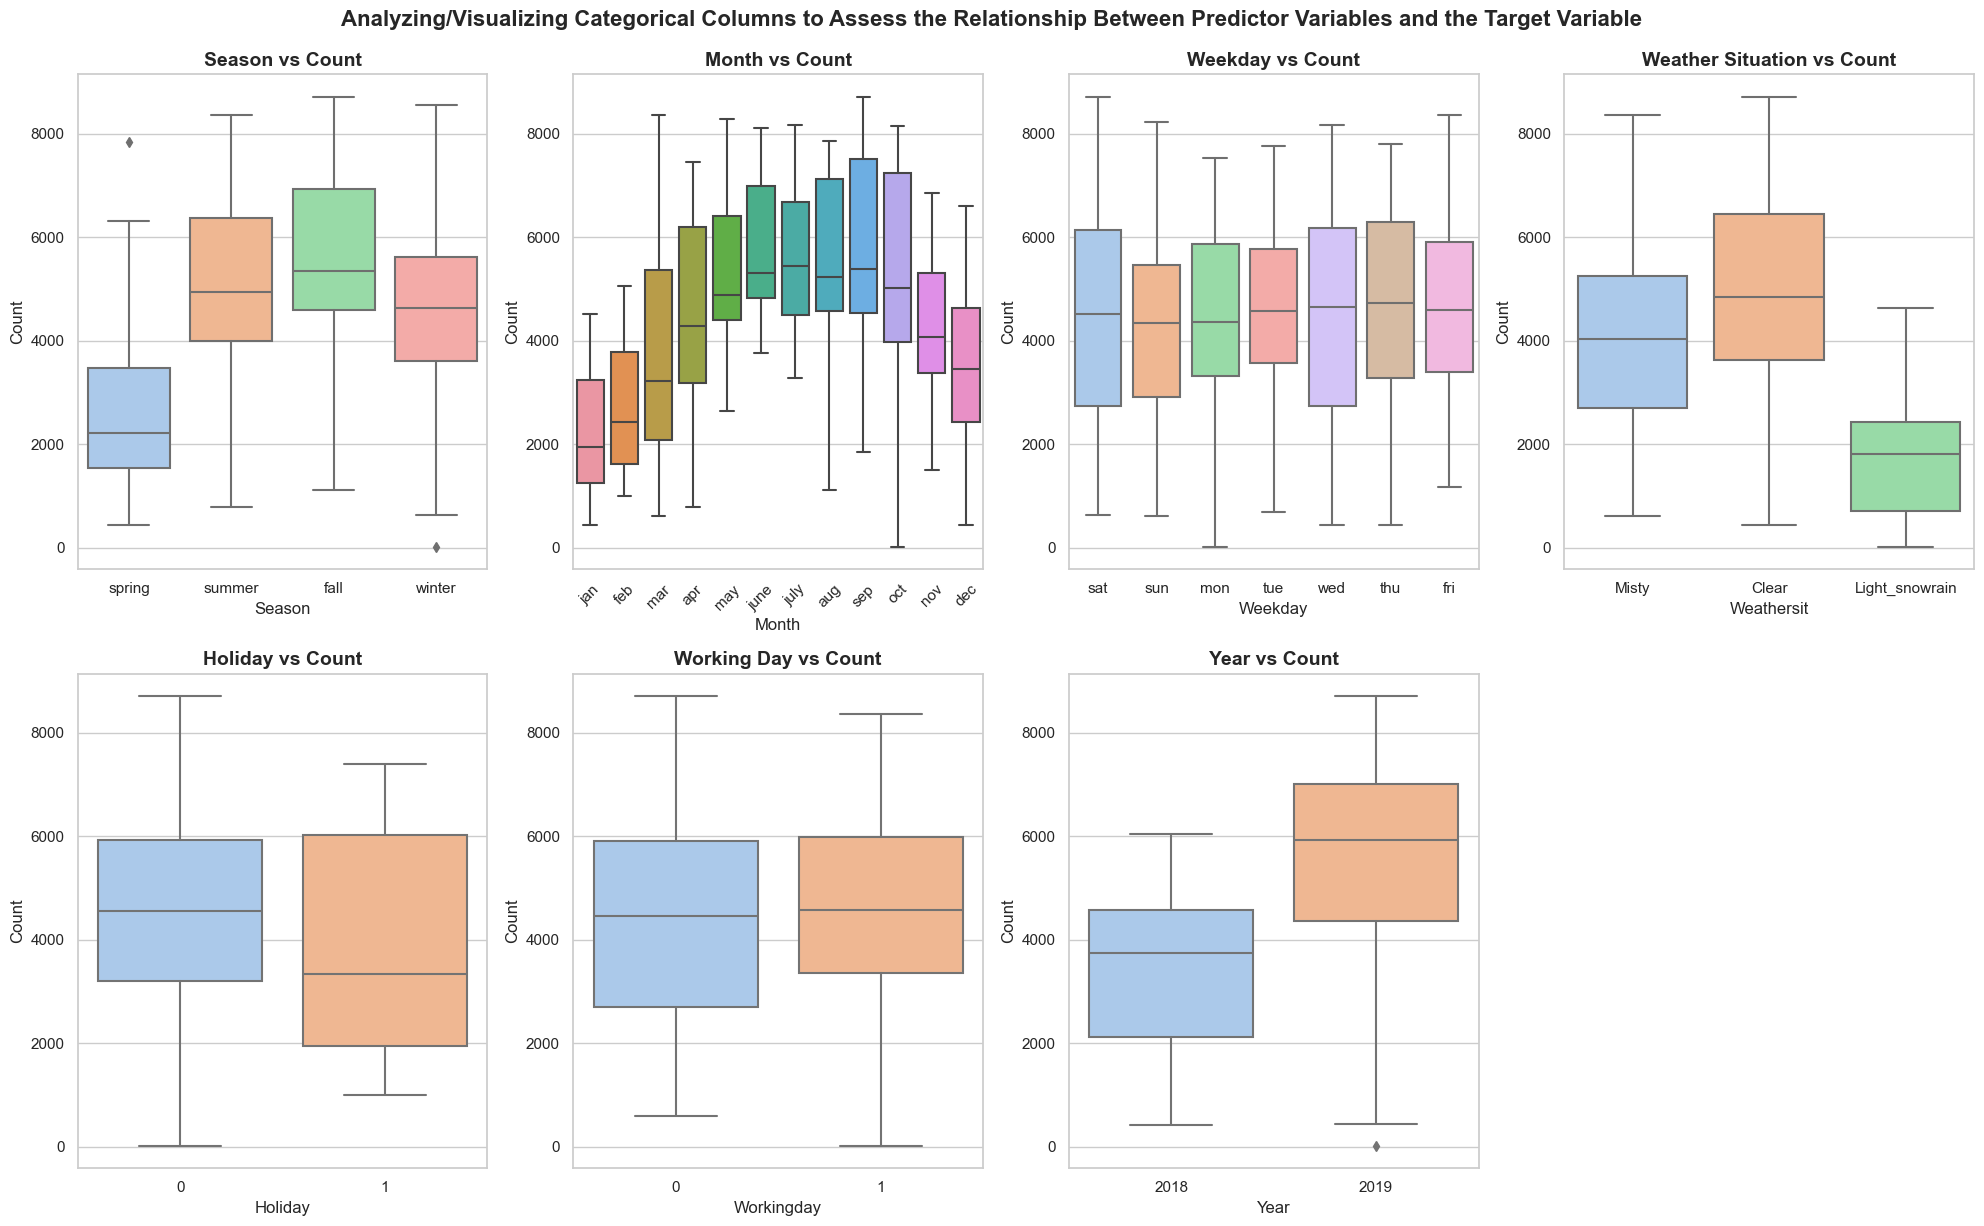

In [29]:



sns.set(style="whitegrid", palette="pastel")


plt.figure(figsize=(20, 12))

# Define a list of columns to plot
categorical_columns = ['season', 'month', 'weekday', 'weathersit', 'holiday', 'workingday', 'year']
titles = ['Season vs Count', 'Month vs Count', 'Weekday vs Count', 'Weather Situation vs Count', 'Holiday vs Count', 'Working Day vs Count', 'Year vs Count']

# Loop through the columns and create boxplots
for i, column in enumerate(categorical_columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=column, y='cnt', data=df)
    plt.title(titles[i], fontsize=14, weight='bold')
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45 if column == 'month' else 0)  # Rotate x-axis labels for months

# Adjust layout and show the plots
plt.tight_layout()
plt.suptitle('Analyzing/Visualizing Categorical Columns to Assess the Relationship Between Predictor Variables and the Target Variable', fontsize=16, weight='bold', y=1.02)
plt.show()


In [25]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


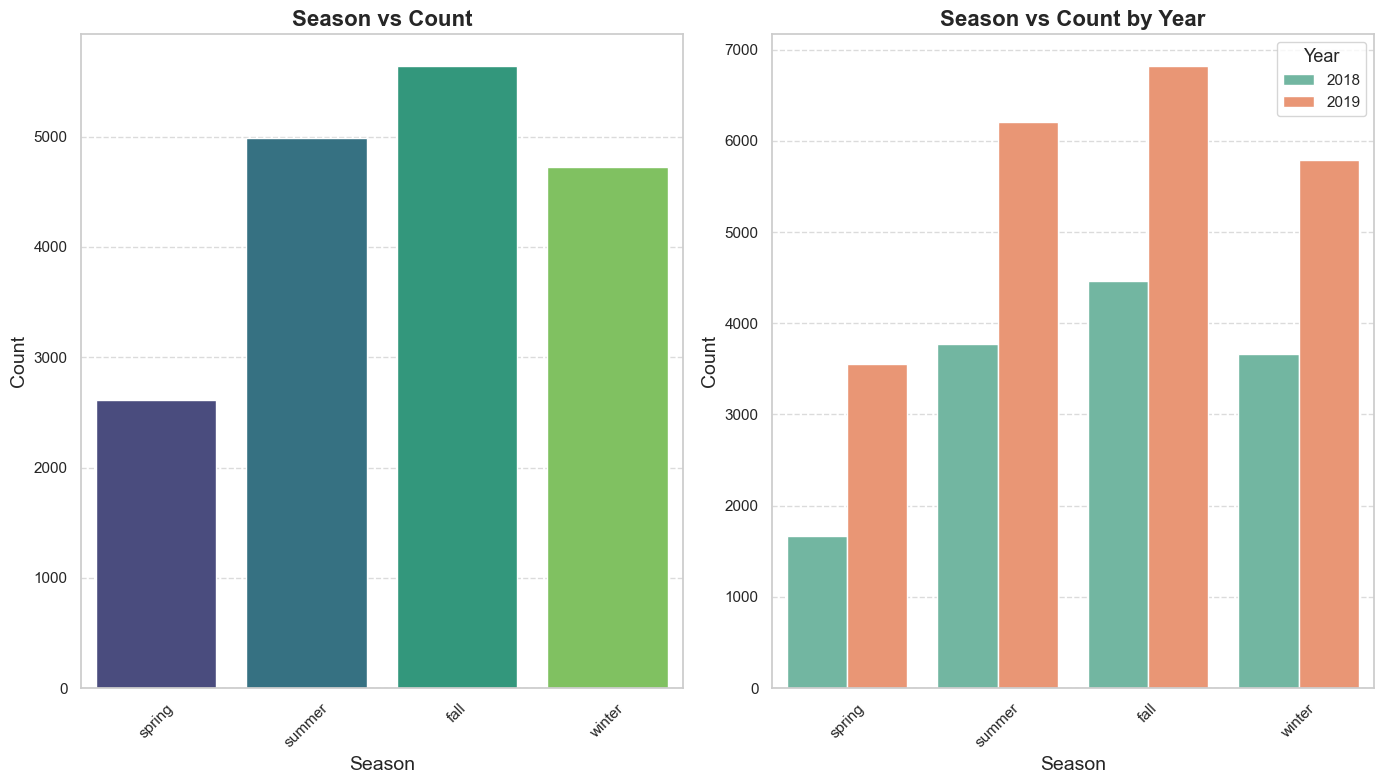

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cat_columns(df, column):
    df['year'] = df['year'].astype(str)  # Ensure 'year' column is of string type
    
    plt.figure(figsize=(14, 8))

    # Plot 1: Simple barplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df, palette='viridis', ci=None)
    plt.title(f'{column.capitalize()} vs Count', fontsize=16, weight='bold')
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Plot 2: Barplot with hue
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', hue='year', data=df, palette='Set2', ci=None)
    plt.title(f'{column.capitalize()} vs Count by Year', fontsize=16, weight='bold')
    plt.xlabel(column.capitalize(), fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Year', title_fontsize='13', fontsize='11')
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


plot_cat_columns(df, 'season')


Fall Season Peak: The fall season has the highest booking counts, indicating it is the most popular season for bookings.
Significant Growth in 2019: There is a noticeable increase in bookings across all seasons in 2019 compared to 2018, showing overall growth in service usage.
Spring Season Growth: The spring season shows the most significant relative increase in bookings from 2018 to 2019, suggesting an emerging trend in popularity during this season.







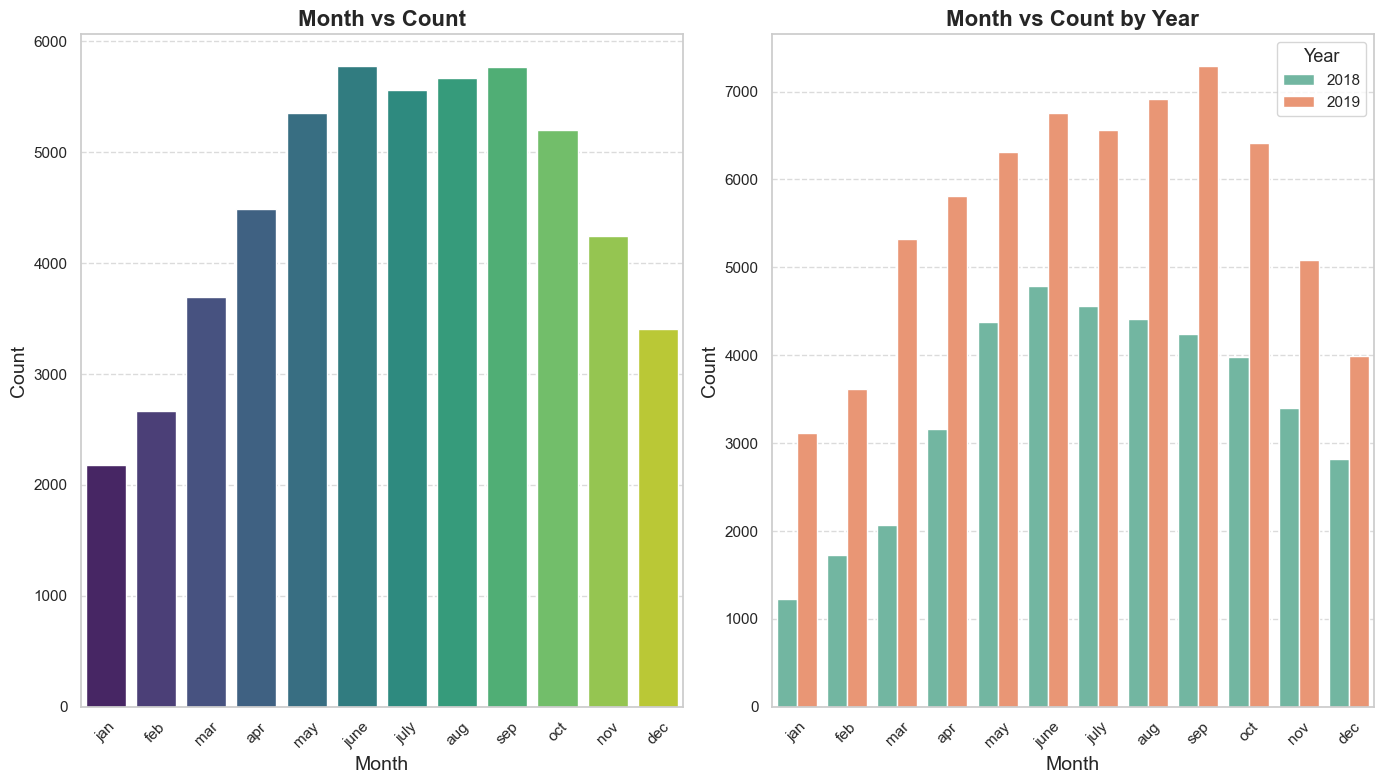

In [31]:
# month visual
plot_cat_columns(df, 'month')

Summer Peak: Bookings are highest in the summer months (June to August) in both years.

Year-over-Year Growth: 2019 consistently shows higher booking counts compared to 2018 across all months.

Notable Increase: Significant increase in bookings is observed particularly during the spring and summer months from 2018 to 2019.

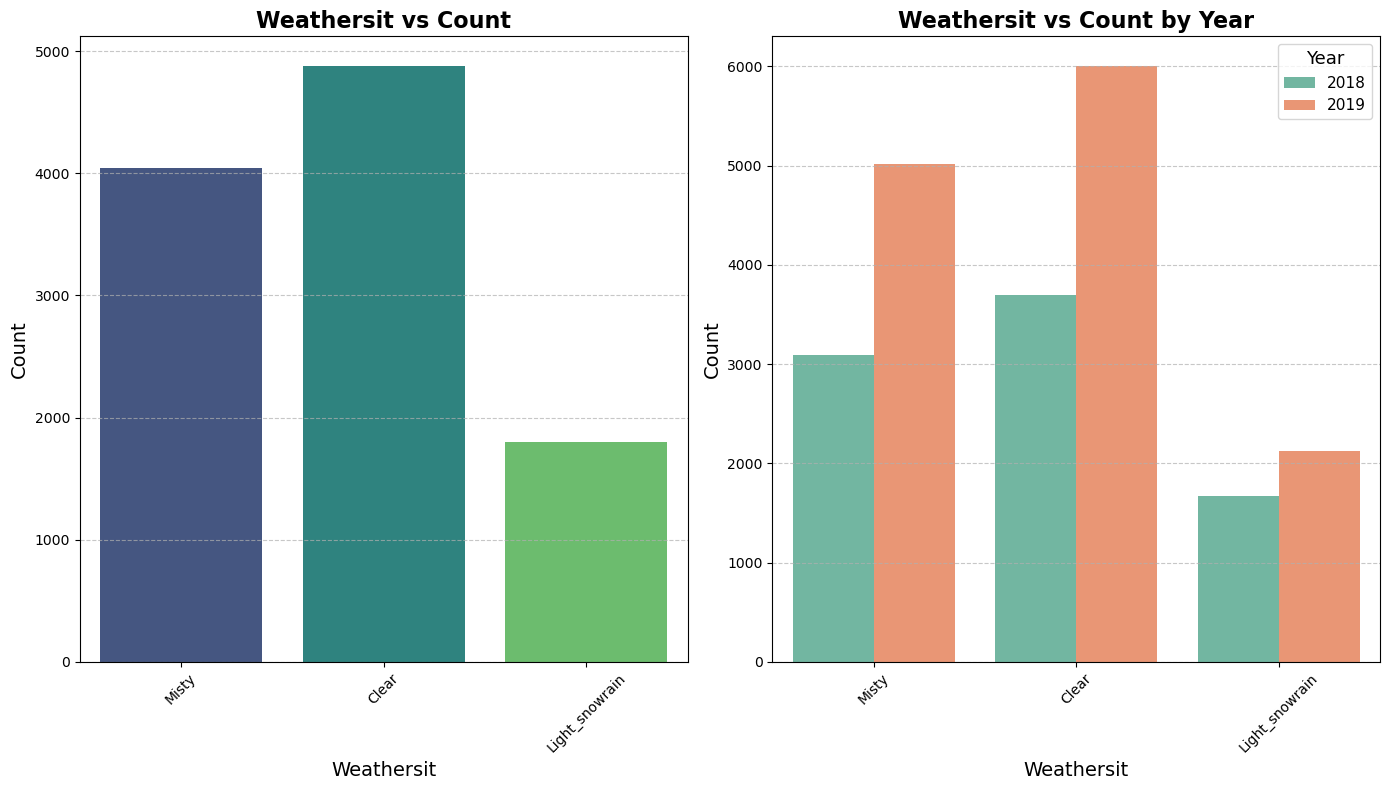

In [28]:
#weathersit column
plot_cat_columns(df, 'weathersit')

Clear Weather Preference: The highest number of bookings occurred during clear weather conditions, indicating that people prefer to book more during clear weather compared to misty or light snow/rain conditions.

Increased Bookings in 2019: There is a noticeable increase in bookings across all weather conditions in 2019 compared to 2018. This suggests a significant growth in the overall number of bookings year-over-year.

Light Snow/Rain Least Preferred: The number of bookings during light snow/rain conditions is the lowest among the three weather types, highlighting that adverse weather conditions tend to deter bookings more than clearer weather.

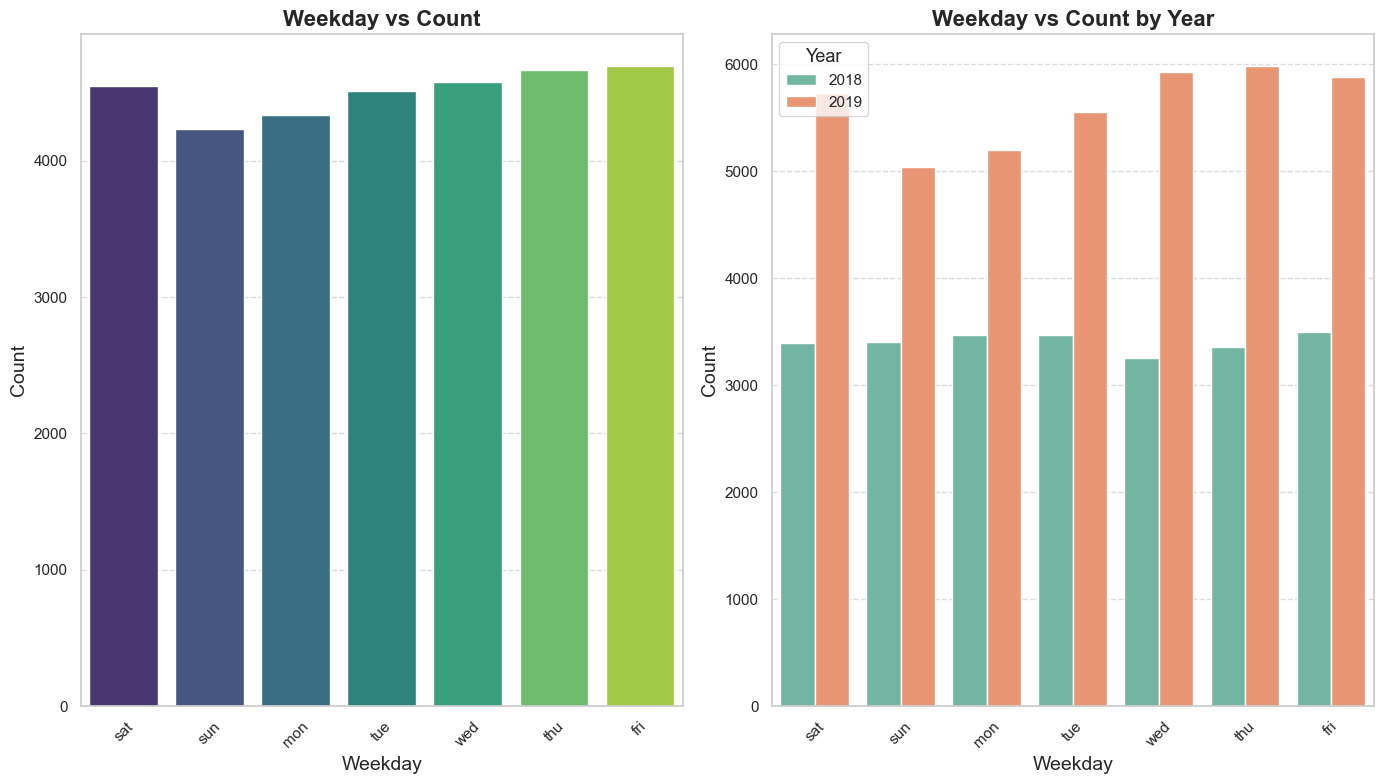

In [32]:
# plotting visualization for weekday column

plot_cat_columns(df, 'weekday')

Consistent Weekday Bookings: Bookings are relatively consistent across all weekdays, with no significant drop or spike on any specific day, indicating steady usage throughout the week.

Higher Bookings in 2019: The booking counts in 2019 are consistently higher for all weekdays compared to 2018, showing an overall increase in popularity or usage of the service in 2019.

Weekend and Midweek Trends: Saturdays have slightly higher booking counts compared to other days in 2018, whereas in 2019, the bookings are uniformly higher across all days with a noticeable peak on Wednesdays and Fridays.

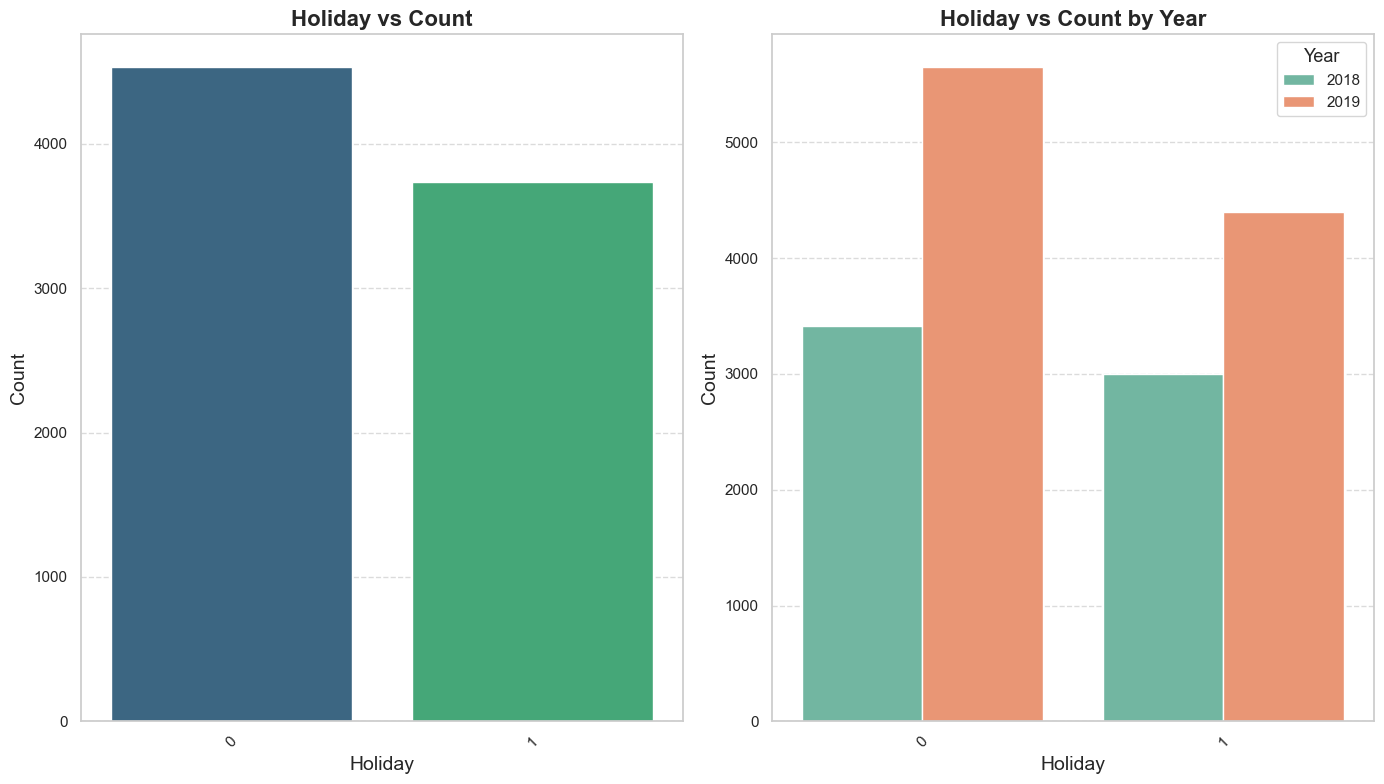

In [33]:
# plotting visualization for holiday column

plot_cat_columns(df, 'holiday')

Higher Non-Holiday Bookings: There are more bookings on non-holidays compared to holidays, indicating that people tend to use the service more on regular days rather than on holidays.

Significant Increase in 2019: Both holidays and non-holidays saw a significant increase in bookings in 2019 compared to 2018, demonstrating overall growth in usage.

Holiday Bookings Growth: The increase in holiday bookings from 2018 to 2019 is particularly notable, suggesting a growing trend of people booking during holidays in 2019.

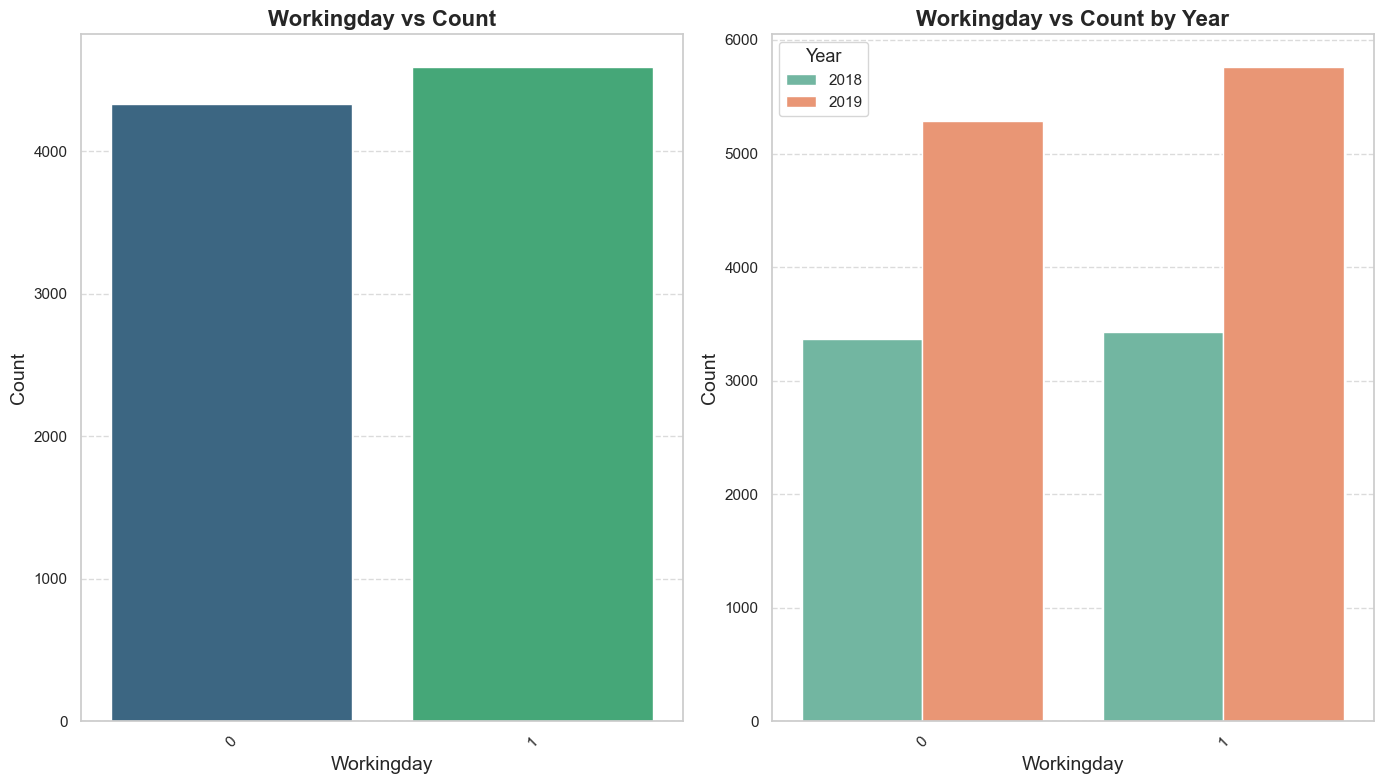

In [34]:
# plotting visualization for workingday column

plot_cat_columns(df, 'workingday')

Similar Bookings on Workdays and Non-Workdays: The number of bookings is relatively similar on both working days and non-working days, indicating consistent usage regardless of the day type.

Increase in 2019: Both working days and non-working days show a significant increase in bookings in 2019 compared to 2018, reflecting overall growth in the service's usage.

Non-Workday Growth: The increase in bookings on non-working days from 2018 to 2019 is particularly pronounced, suggesting that the service has become more popular for leisure activities or other non-work-related uses in 2019.

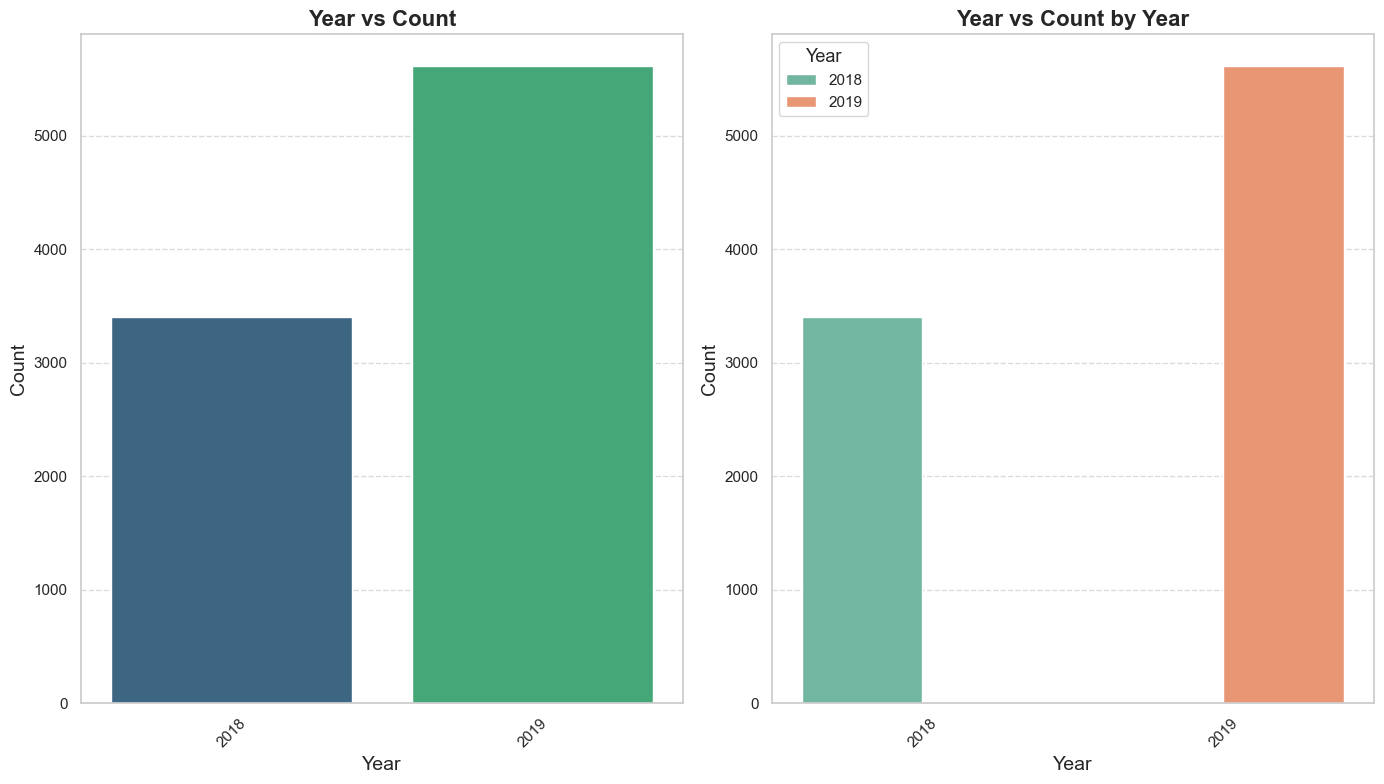

In [35]:
# plotting visualization for year column

plot_cat_columns(df, 'year')

Significant Growth in 2019: Bookings increased significantly in 2019 compared to 2018.

Higher Usage in 2019: The count of bookings in 2019 nearly doubles that of 2018.

Overall Trend: There is a clear upward trend in bookings from 2018 to 2019.

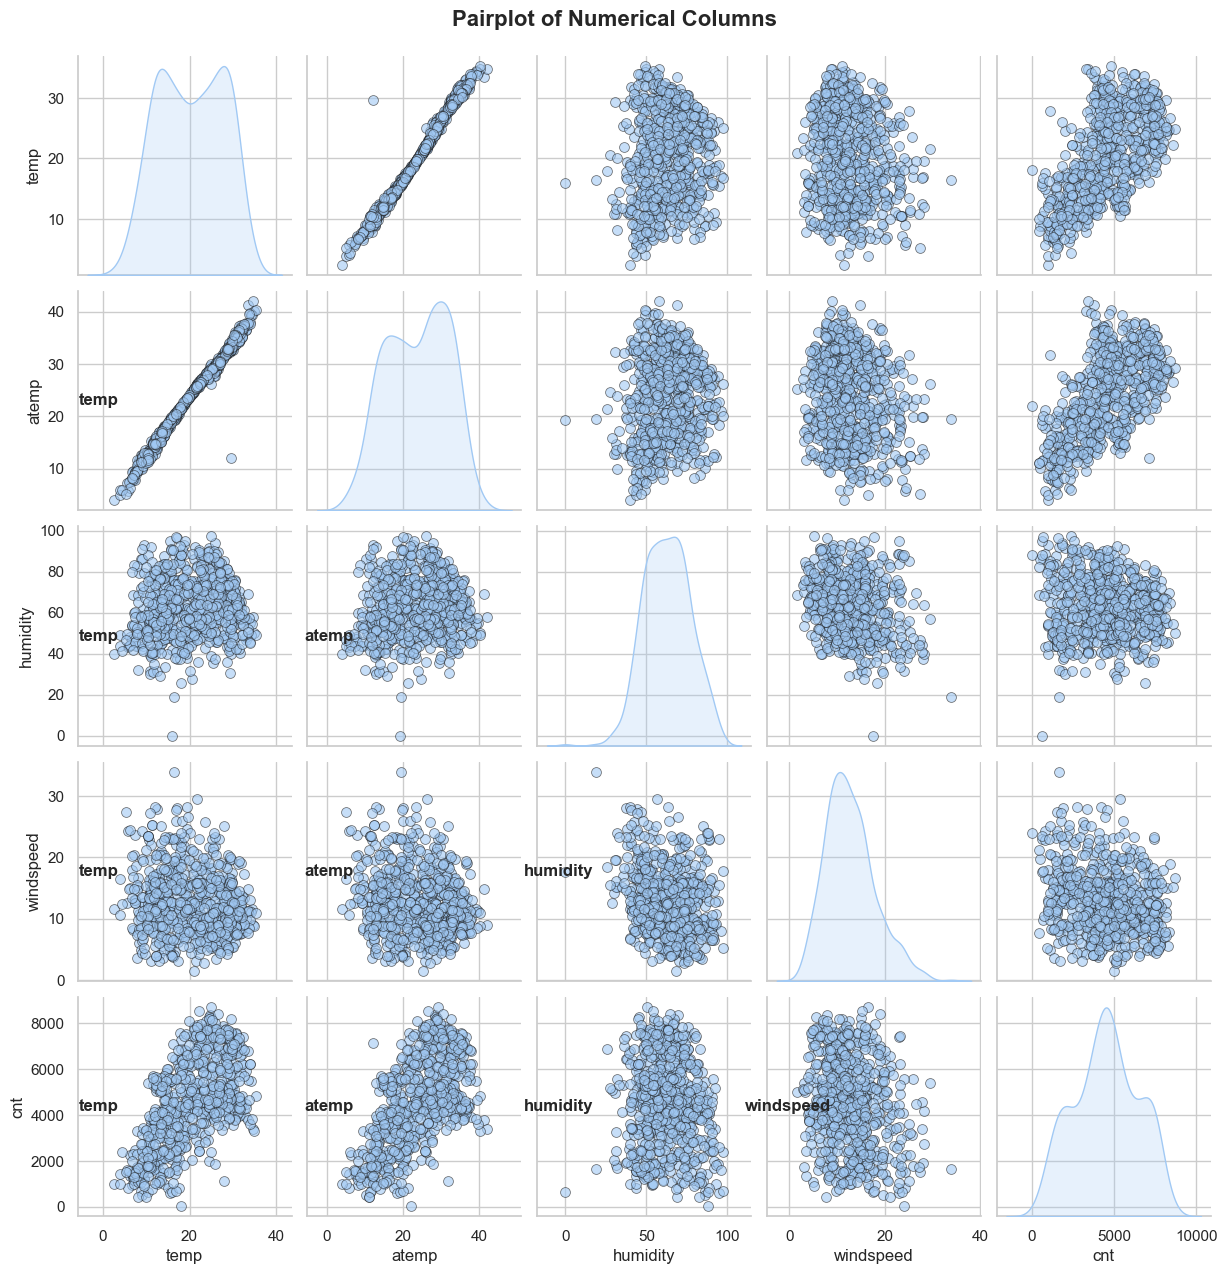

In [36]:


sns.set(style="whitegrid", palette="pastel")


pairplot = sns.pairplot(
    data=df,
    vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'],
    diag_kind="kde",  # Use kernel density estimates for the diagonal plots
    plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'},  # Scatter plot options
    diag_kws={'shade': True}  # KDE plot options
)


for i, j in zip(*np.tril_indices_from(pairplot.axes, -1)):
    pairplot.axes[i, j].annotate(
        pairplot.x_vars[j], (0.1, 0.5), xycoords='axes fraction', ha='center', va='center', fontsize=12, weight='bold'
    )
    
pairplot.fig.suptitle("Pairplot of Numerical Columns", y=1.02, fontsize=16, weight='bold')

plt.show()


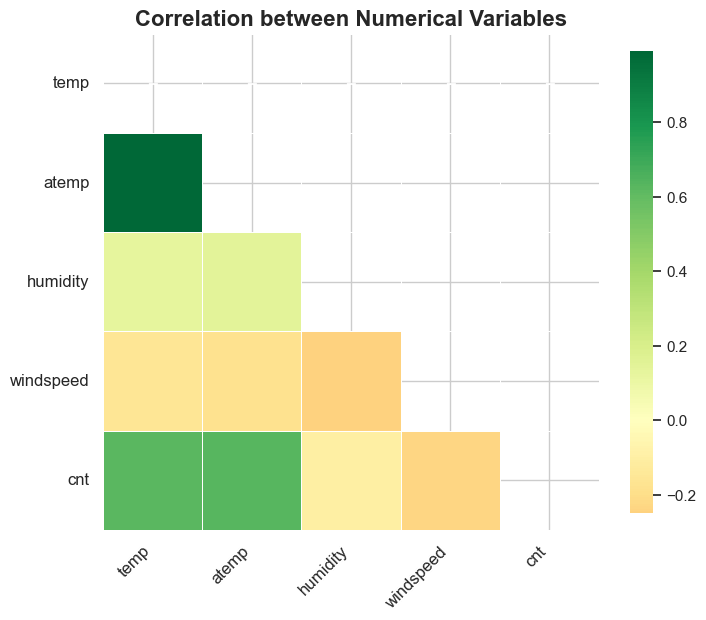

In [37]:

# Checking the correlation between the numerical variables
plt.figure(figsize=(8, 8))

# Compute the correlation matrix and mask the upper triangle
corr_matrix = df[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with improved aesthetics
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="RdYlGn",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 12, "weight": "bold"}
)

# Add title with better formatting
plt.title("Correlation between Numerical Variables", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()


#### There is linear relationship between temp and atemp. 

## Step 3: Data Preparation

In [38]:
# Inspect the data types of the columns
print(df[['month', 'weekday', 'weathersit', 'season']].dtypes)


month         object
weekday       object
weathersit    object
season        object
dtype: object


In [39]:

# Ensure categorical columns are of string type
categorical_columns = ['month', 'weekday', 'weathersit', 'season']
for column in categorical_columns:
    df[column] = df[column].astype(str)

# Create dummy variables for the specified columns and drop the first category to avoid multicollinearity
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the new DataFrame with dummy variables
df_dummies.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [41]:
# Check unique values in each categorical column 
for column in ['month', 'weekday', 'weathersit', 'season']:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in month: ['jan' 'feb' 'mar' 'apr' 'may' 'june' 'july' 'aug' 'sep' 'oct' 'nov' 'dec']
Unique values in weekday: ['sat' 'sun' 'mon' 'tue' 'wed' 'thu' 'fri']
Unique values in weathersit: ['Misty' 'Clear' 'Light_snowrain']
Unique values in season: ['spring' 'summer' 'fall' 'winter']


In [42]:
df_new = df_dummies

In [43]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,True,False,False,False,False,False,True,True,False,False
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,True,False,False,False,False,True,True,False,False
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,True,False,False
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,True,False,False


In [44]:
bool_columns = df_new.select_dtypes(include=['bool']).columns

# Convert boolean columns to 0 and 1
df_new[bool_columns] = df_new[bool_columns].astype(int)

In [45]:
df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    object 
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   month_aug                  730 non-null    int32  
 9   month_dec                  730 non-null    int32  
 10  month_feb                  730 non-null    int32  
 11  month_jan                  730 non-null    int32  
 12  month_july                 730 non-null    int32  
 13  month_june                 730 non-null    int32  

In [47]:
# check the head of new dataframe

df_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [48]:
# check the shape of new dataframe

df_new.shape

(730, 30)

In [49]:
# check the column info of new dataframe 

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    object 
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   humidity                   730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   month_aug                  730 non-null    int32  
 9   month_dec                  730 non-null    int32  
 10  month_feb                  730 non-null    int32  
 11  month_jan                  730 non-null    int32  
 12  month_july                 730 non-null    int32  
 13  month_june                 730 non-null    int32  

## Step 4: Splitting the Data into Training and Testing Sets

In [50]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)

In [51]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [52]:
# check the shape of testing datatset

df_test.shape

(220, 30)

In [53]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [54]:
# verifying the head of dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [55]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [57]:
# describing the dataset

df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,month_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


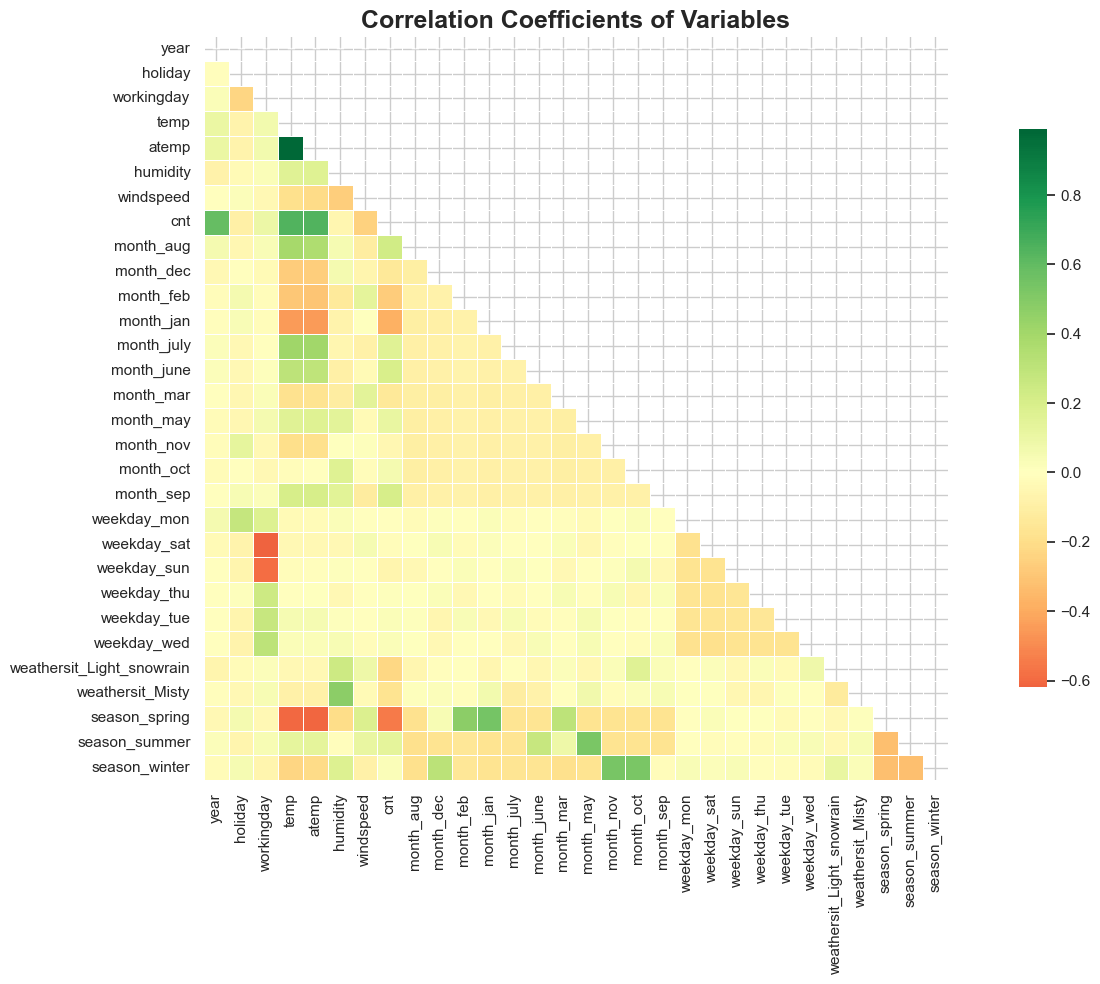

In [61]:

sns.set(style="whitegrid", palette="pastel")

# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(15, 10))


corr_matrix = df_train.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="RdYlGn",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10, "weight": "bold"}
)


plt.title("Correlation Coefficients of Variables", fontsize=18, weight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Correlation with cnt: The number of bookings (cnt) shows a positive correlation with the year variable and temperature (temp), indicating that higher temperatures and the progression of time are associated with an increase in bookings.

Misty and Humidity Correlation: There is a noticeable correlation between misty weather conditions (weathersit_Misty) and humidity, suggesting that misty conditions tend to occur when humidity levels are higher.

Seasonal and Monthly Correlations:

The spring season shows good correlation with the months of January and February.
The summer season is strongly correlated with the month of May.
The winter season shows a significant co

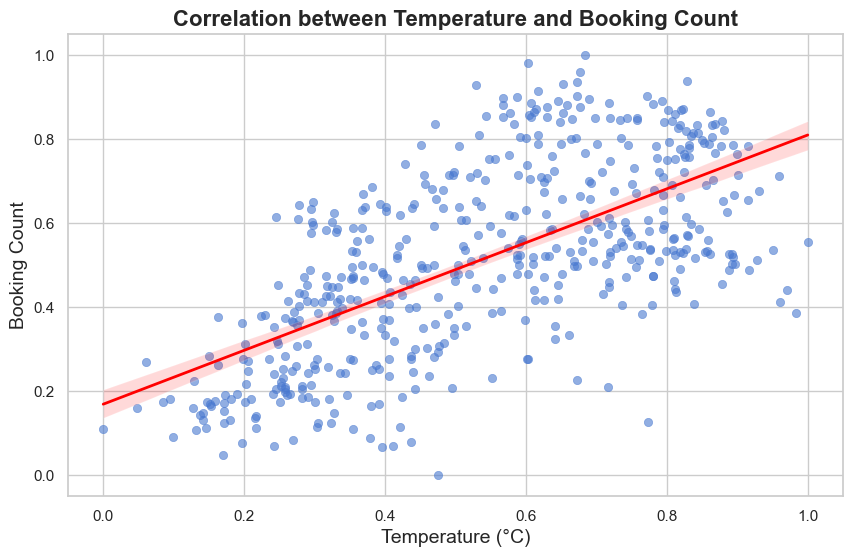

In [63]:
sns.set(style="whitegrid", palette="muted")


plt.figure(figsize=[10, 6])
sns.scatterplot(x='temp', y='cnt', data=df_train, alpha=0.6, edgecolor=None)
sns.regplot(x='temp', y='cnt', data=df_train, scatter=False, color='red', line_kws={"linewidth": 2})

# Add titles and labels
plt.title('Correlation between Temperature and Booking Count', fontsize=16, weight='bold')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Booking Count', fontsize=14)

# Show the plot
plt.show()


The visualization confirms a positive correlation between temperature and booking count.

In [64]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [66]:
# Recursive feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

# Specify the estimator and the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [67]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_aug', False, 7),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 13),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [68]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'month_jan', 'month_july', 'month_sep', 'weekday_sat',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'season_spring',
       'season_summer', 'season_winter'],
      dtype='object')


In [69]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_june',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [94]:
# Ensure all columns in X_train_rfe are numeric
numeric_cols = X_train_rfe.select_dtypes(include=[np.number]).columns
non_numeric_cols = [col for col in X_train_rfe.columns if col not in numeric_cols]

print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: []


In [98]:
X_train_rfe['year'] = X_train_rfe['year'].astype(int)

df['year'] = df['year'].astype(int)

X_train['year'] = X_train['year'].astype(int)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int32  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 65.7+ KB


In [99]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [112]:
# dataframe with RFE selected variables

X_train_rfe = X_train

In [113]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,11667625.95
19,weekday_sat,2671698.71
20,weekday_sun,2468910.52
1,holiday,439596.88
3,temp,66.90
4,atemp,56.03
26,season_spring,10.77
28,season_winter,9.46
27,season_summer,8.29
15,month_nov,6.79


humidity & year shows high VIF value.

## Step 5: Building a linear model

In [114]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Thu, 13 Jun 2024   Prob (F-statistic):          2.81e-180
Time:                        09:00:23   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [120]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday', 'temp', 'weekday_sat','weekday_sun','atemp','year', 'season_winter','humidity'], axis = 1)


calculateVIF(X_train_new)

,Features,VIF
19,season_spring,7.45
1,windspeed,4.73
5,month_jan,3.60
20,season_summer,3.55
4,month_feb,2.97
8,month_mar,2.60
9,month_may,1.83
18,weathersit_Misty,1.62
10,month_nov,1.52
3,month_dec,1.47


VIF Scores are appropriate now

In [121]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     24.80
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.12e-63
Time:                        09:02:17   Log-Likelihood:                 224.08
No. Observations:                 510   AIC:                            -404.2
Df Residuals:                     488   BIC:                            -311.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [122]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['month_dec', 'month_july', 'month_mar', 'month_oct'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
15,season_spring,3.73
1,windspeed,3.37
16,season_summer,2.69
4,month_jan,2.03
3,month_feb,1.77
6,month_may,1.67
14,weathersit_Misty,1.50
9,weekday_mon,1.36
12,weekday_wed,1.32
7,month_nov,1.29


VIF is a little different but the R-squared in not that good still

In [123]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     28.12
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.04e-61
Time:                        09:03:50   Log-Likelihood:                 212.02
No. Observations:                 510   AIC:                            -388.0
Df Residuals:                     492   BIC:                            -311.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [124]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     28.12
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.04e-61
Time:                        09:05:18   Log-Likelihood:                 212.02
No. Observations:                 510   AIC:                            -388.0
Df Residuals:                     492   BIC:                            -311.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### We can cosider the above model i.e lr_6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.

#### F-Statistics value of 28.12 (which is greater than 1) and the p-value of 1.04e-61 i.e almost equals to zero, states that the overall model is significant

In [125]:
# Checking the parameters and their coefficient values
lr_6.params

const                        0.641511
holiday                     -0.093645
windspeed                   -0.149324
month_aug                    0.092239
month_feb                   -0.063135
month_jan                   -0.121478
month_june                   0.096938
month_may                    0.062919
month_nov                   -0.071209
month_sep                    0.111349
weekday_mon                  0.016958
weekday_thu                  0.013651
weekday_tue                  0.012878
weekday_wed                  0.023315
weathersit_Light_snowrain   -0.344234
weathersit_Misty            -0.093006
season_spring               -0.194830
season_summer               -0.029763
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [126]:
X_train_lm_6

,const,holiday,windspeed,month_aug,month_feb,month_jan,month_june,month_may,month_nov,month_sep,weekday_mon,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer
576,1.0,0,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1.0,0,0.255342,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
728,1.0,0,0.663106,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
482,1.0,0,0.188475,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
111,1.0,0,0.380981,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0.187140,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
53,1.0,0,0.111379,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
350,1.0,0,0.431816,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
79,1.0,0,0.529881,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [127]:
y_train_pred = lr_6.predict(X_train_lm_6)

#### Normality of error terms

Text(0.5, 0, 'Errors')

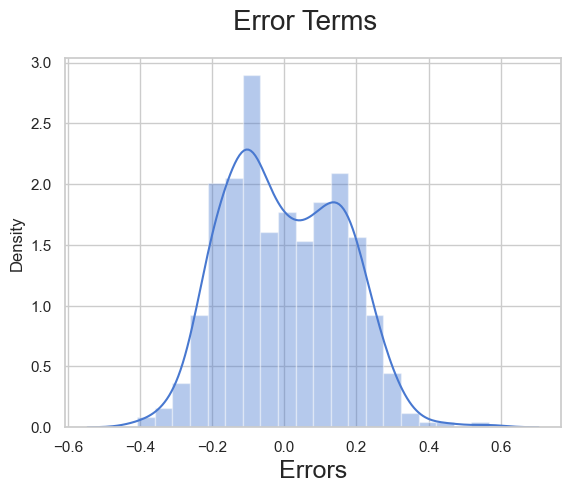

In [129]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

The distribution of the error terms in your plot appears to be approximately normal, but it’s not perfectly normal.

#### Multi Colinearity

In [130]:
calculateVIF(X_train_new)

,Features,VIF
15,season_spring,3.73
1,windspeed,3.37
16,season_summer,2.69
4,month_jan,2.03
3,month_feb,1.77
6,month_may,1.67
14,weathersit_Misty,1.50
9,weekday_mon,1.36
12,weekday_wed,1.32
7,month_nov,1.29


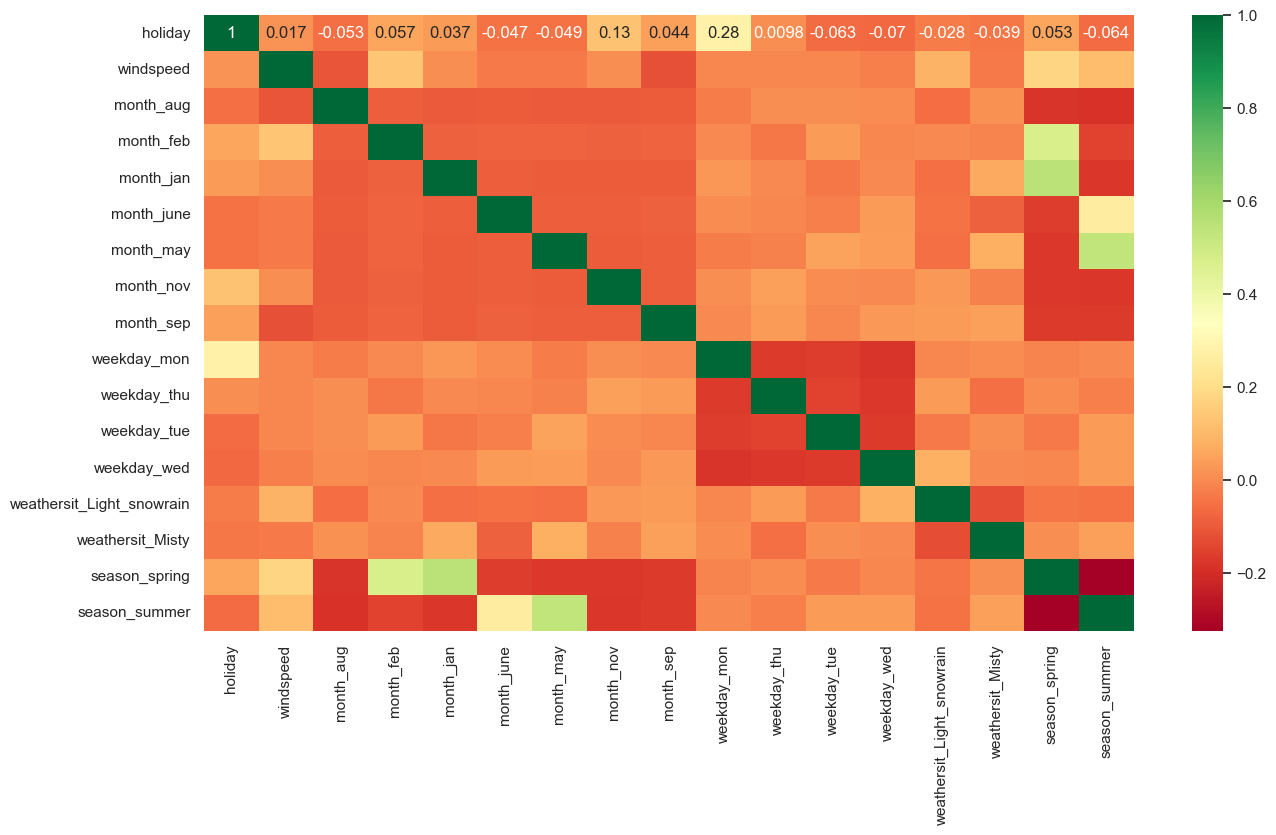

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 6th model.

In [132]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,2018,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,2018,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,2018,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [133]:
df_test.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,cnt,month_aug,month_dec,month_feb,...,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty,season_spring,season_summer,season_winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
y_test = df_test.pop('cnt')
X_test = df_test

In [135]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_6 = sm.add_constant(X_test)

In [136]:
y_pred = lr_6.predict(X_test_lm_6)

In [137]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.4531

## Step 8: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

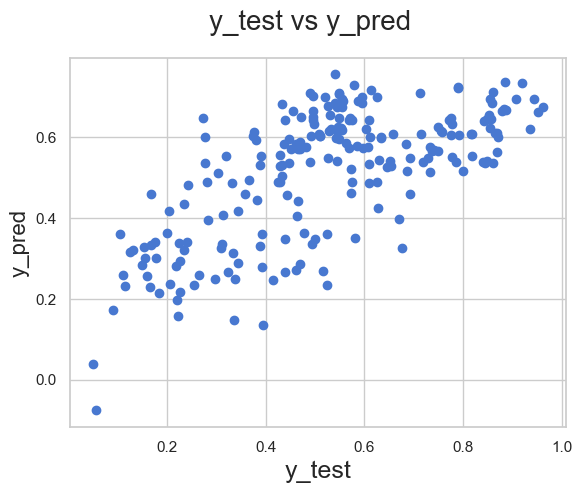

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [139]:
round(lr_6.params,4)

const                        0.6415
holiday                     -0.0936
windspeed                   -0.1493
month_aug                    0.0922
month_feb                   -0.0631
month_jan                   -0.1215
month_june                   0.0969
month_may                    0.0629
month_nov                   -0.0712
month_sep                    0.1113
weekday_mon                  0.0170
weekday_thu                  0.0137
weekday_tue                  0.0129
weekday_wed                  0.0233
weathersit_Light_snowrain   -0.3442
weathersit_Misty            -0.0930
season_spring               -0.1948
season_summer               -0.0298
dtype: float64

In [140]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.407


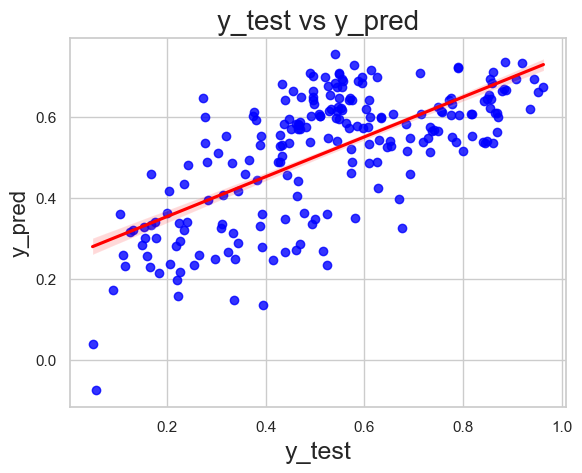

In [141]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.493
    - Test dataset R^2           : 0.4531

#### Demand of bikes depend on holiday, windspeed, 
month_au, 
month_fe31
